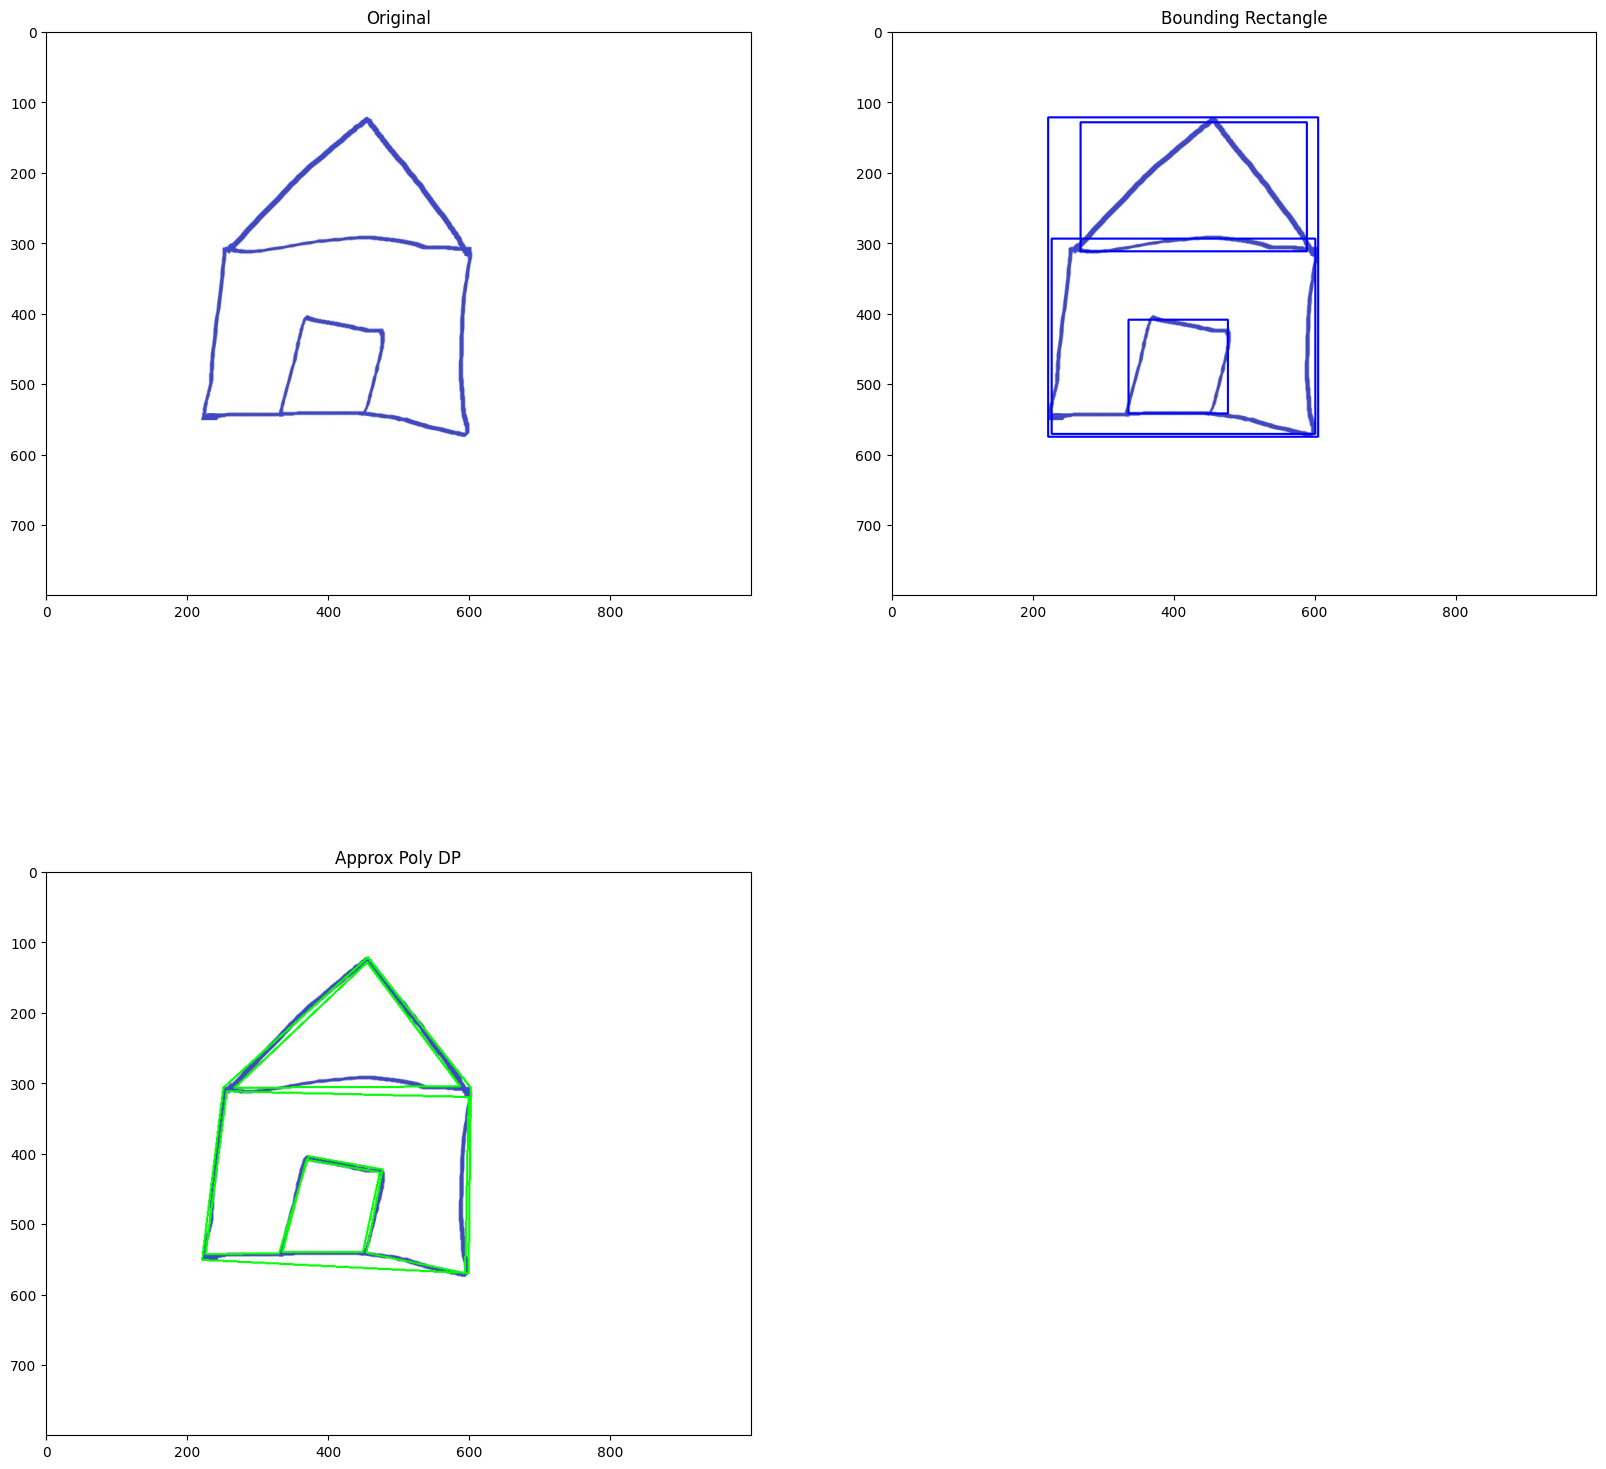

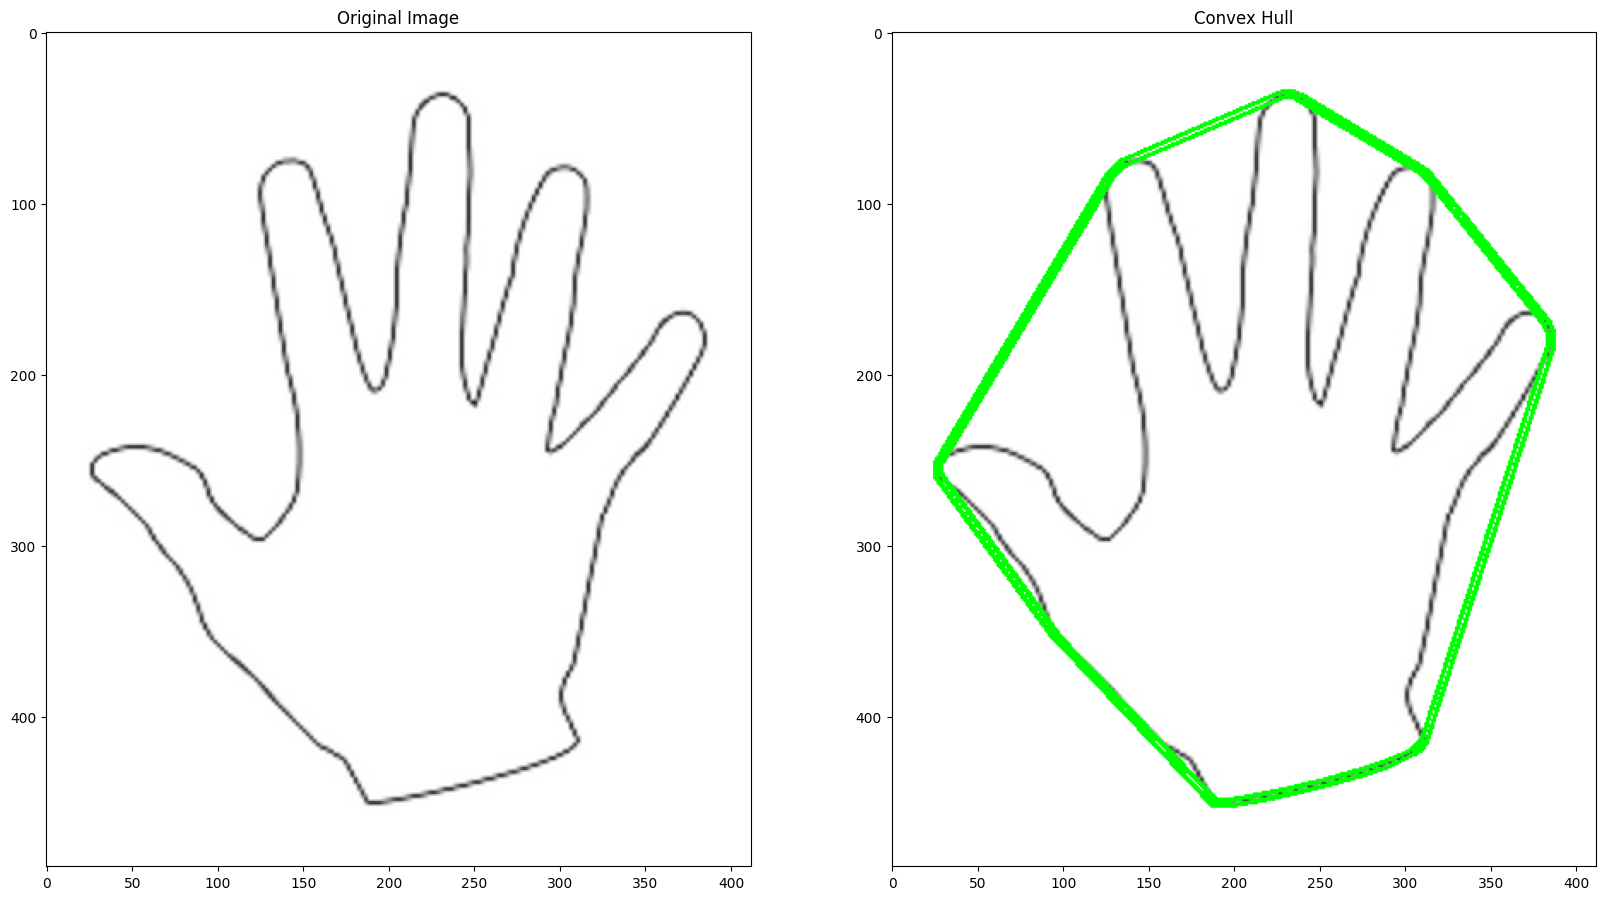

In [2]:
### 11.Approximating Contours and Convex Hull
### 11.근사 윤곽선 및 볼록 껍질
# cv2.approxPolyDP(contour - , Approximation Accuracy, Closed)
# contour: 근사하고자 하는 개별 윤곽선
# Approximation Accuracy: 중요한 매개 변수는 근사의 정확도를 결정하는 것 
# 작은 값은 정확한 근사치를 제공, 큰 값은 더 일반적인 근사치를 제공. 경험칙은 윤곽선 둘레의 5% 미만
# Closed: 대략적인 윤곽선을 열어야 하는지 또는 닫아야 하는지를 나타내는 부울 값

import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread("../Examples/house.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.title("Original")
plt.imshow(image)

orig_image = image.copy()

# 그레이스케일과 이진화
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# 윤곽선 찾기
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# 각 윤곽선을 반복하고 경계 사각형을 계산
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image, (x,y),(x+w,y+h),(0,0,255),2)
    plt.subplot(2,2,2)
    plt.title("Bounding Rectangle")
    plt.imshow(orig_image)
    
cv2.waitKey(0)  # 키 입력을 기다리는 대기 함수 
# wiatKey(0): 무한 대기 / ms(밀리세컨) 단위의 시간을 입력하면 해당 시간만큼 대기 (1000ms = 1초)

# 각 윤곽선을 반복하고 대략적인 윤곽선을 계산
for c in contours:
    # 윤곽선 둘레의 백분율로 정확도 계산
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    
    plt.subplot(2,2,3)
    plt.title("Approx Poly DP")
    plt.imshow(image)
    
plt.show()

# Convex Hull(볼록 껍질)

image = cv2.imread("../Examples/hand.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(image)

# 이미지 임계값
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# 윤곽선 찾기
contours, hierarchy = cv2.findContours(thresh.copy(), cv2. RETR_LIST, cv2.CHAIN_APPROX_NONE)

# 영역별로 윤곽선 정렬 후 가장 큰 프레임 윤곽선 제거
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# contours을 반복하고 convex hull 그리기
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0,255,0), 2)
    
    plt.subplot(1,2,2)
    plt.title("Convex Hull")
    plt.imshow(image)